In [2]:
import tensorflow
import os

# Chemin vers le répertoire dans lequel vous voulez organiser les données
datasets_dir = r"C:\Users\user\Desktop\data1"

In [3]:
import os
import shutil
import random

# Chemin source où les images sont décompressées
source_dir = r'C:\Users\user\Desktop\data1\detection'

# Chemins pour les ensembles d'entraînement et de validation
train_dir = r'C:\Users\user\Desktop\data1\train'
val_dir = r'C:\Users\user\Desktop\data1\val'

# Créer les répertoires s'ils n'existent pas déjà
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Liste des classes, avec le nom correct pour "daisy"
classes = ['notsmoking', 'smoking']

# Fonction pour répartir les images en ensembles d'entraînement et de validation
def split_data(source_dir, train_dir, val_dir, split_ratio=0.8):
    for class_name in classes:
        # Créer des sous-dossiers pour chaque classe dans train et val
        os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
        os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)

        # Liste des images dans chaque classe
        class_dir = os.path.join(source_dir, class_name)
        images = os.listdir(class_dir)
        random.shuffle(images)  # Mélanger les images

        # Calcul du nombre d'images pour l'entraînement
        train_size = int(len(images) * split_ratio)
        train_images = images[:train_size]
        val_images = images[train_size:]

        # Déplacer les images dans les dossiers train et val correspondants
        for img in train_images:
            shutil.move(os.path.join(class_dir, img), os.path.join(train_dir, class_name, img))

        for img in val_images:
            shutil.move(os.path.join(class_dir, img), os.path.join(val_dir, class_name, img))

# Appel de la fonction pour organiser les images
split_data(source_dir, train_dir, val_dir)
print("Images réparties entre les ensembles d'entraînement et de validation.")


Images réparties entre les ensembles d'entraînement et de validation.


Affichage d'images pour la classe : smoking


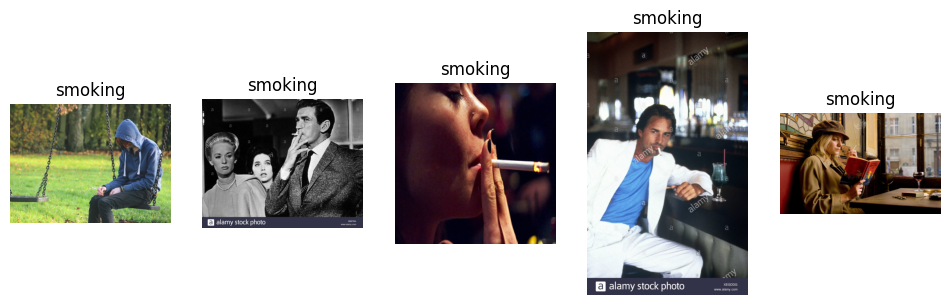

In [5]:
import matplotlib.pyplot as plt
import os
import random
from PIL import Image

# Chemin vers le répertoire d'entraînement
train_dir = r'C:\Users\user\Desktop\data1\train'

# Classes dans le dataset
classes = ['smoking','notsmoking']

# Choisir une classe aléatoire
class_name = 'smoking'
print(f"Affichage d'images pour la classe : {class_name}")

# Chemin vers le dossier de la classe choisie
class_dir = os.path.join(train_dir, class_name)

# Lister les images dans le dossier de la classe choisie
image_files = os.listdir(class_dir)

# Sélectionner 5 images aléatoires à afficher
random_images = random.sample(image_files, 5)

# Afficher les images
plt.figure(figsize=(12, 8))
for i, img_name in enumerate(random_images):
    img_path = os.path.join(class_dir, img_name)
    img = Image.open(img_path)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis('off')

plt.show()


Affichage d'images pour la classe : notsmoking


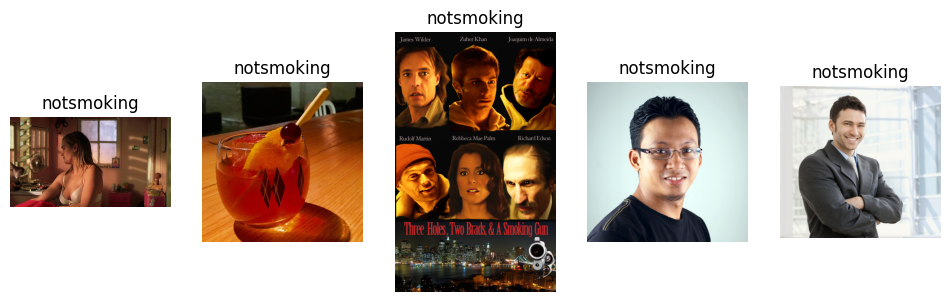

In [6]:
import matplotlib.pyplot as plt
import os
import random
from PIL import Image

# Chemin vers le répertoire d'entraînement
train_dir = r'C:\Users\user\Desktop\data1\train'

# Classes dans le dataset
classes = ['smoking','notsmoking']

# Choisir une classe aléatoire
class_name = 'notsmoking'
print(f"Affichage d'images pour la classe : {class_name}")

# Chemin vers le dossier de la classe choisie
class_dir = os.path.join(train_dir, class_name)

# Lister les images dans le dossier de la classe choisie
image_files = os.listdir(class_dir)

# Sélectionner 5 images aléatoires à afficher
random_images = random.sample(image_files, 5)

# Afficher les images
plt.figure(figsize=(12, 8))
for i, img_name in enumerate(random_images):
    img_path = os.path.join(class_dir, img_name)
    img = Image.open(img_path)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis('off')

plt.show()

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Création des générateurs d'images pour l'entraînement et la validation
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalisation des pixels
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Chargement des images depuis les dossiers train et val
train_generator = train_datagen.flow_from_directory(
    r'C:\Users\user\Desktop\data1\train',
    target_size=(150, 150),  # Taille de redimensionnement des images
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    r'C:\Users\user\Desktop\data1\val',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)


Found 5401 images belonging to 2 classes.
Found 1348 images belonging to 2 classes.


In [8]:
from tensorflow.keras import layers, models

# Définir le modèle CNN
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))  

# Compiler le modèle
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [10]:
# Entraînement du modèle
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=30,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)

Epoch 1/30
 53/168 [========>.....................] - ETA: 9:53 - loss: 0.6983 - accuracy: 0.5678 

c:\Users\user\Desktop\FATIGUE\.venv\lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


168/168 [==============================] - 1126s 6s/step - loss: 0.6440 - accuracy: 0.6403 - val_loss: 0.6162 - val_accuracy: 0.6689
Epoch 2/30
168/168 [==============================] - 670s 4s/step - loss: 0.6063 - accuracy: 0.6847 - val_loss: 0.5827 - val_accuracy: 0.7039
Epoch 3/30
168/168 [==============================] - 634s 4s/step - loss: 0.5934 - accuracy: 0.6826 - val_loss: 0.5815 - val_accuracy: 0.7009
Epoch 4/30
168/168 [==============================] - 637s 4s/step - loss: 0.6038 - accuracy: 0.6804 - val_loss: 0.6033 - val_accuracy: 0.6838
Epoch 5/30
168/168 [==============================] - 715s 4s/step - loss: 0.5897 - accuracy: 0.6875 - val_loss: 0.5753 - val_accuracy: 0.7039
Epoch 6/30
168/168 [==============================] - 707s 4s/step - loss: 0.5914 - accuracy: 0.6934 - val_loss: 0.5852 - val_accuracy: 0.7001
Epoch 7/30
168/168 [==============================] - 826s 5s/step - loss: 0.5851 - accuracy: 0.6990 - val_loss: 0.5999 - val_accuracy: 0.6719
Epoch 8/3

In [11]:
# Sauvegarder le modèle dans Google Drive
model_save_path = r'C:\Users\user\Desktop\data1\cnn_model_SMOKING.h5'
model.save(model_save_path)
print(f"Modèle sauvegardé à : {model_save_path}")

c:\Users\user\Desktop\FATIGUE\.venv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Modèle sauvegardé à : C:\Users\user\Desktop\data1\cnn_model_SMOKING.h5


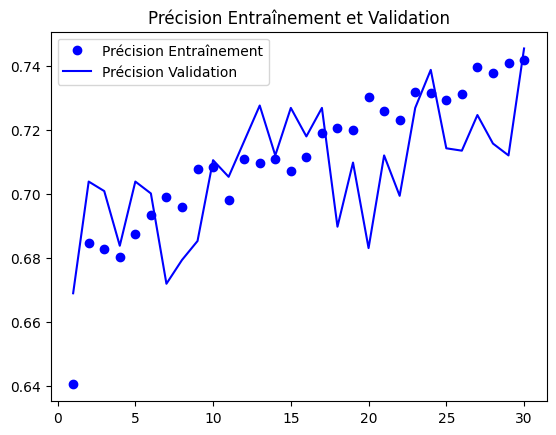

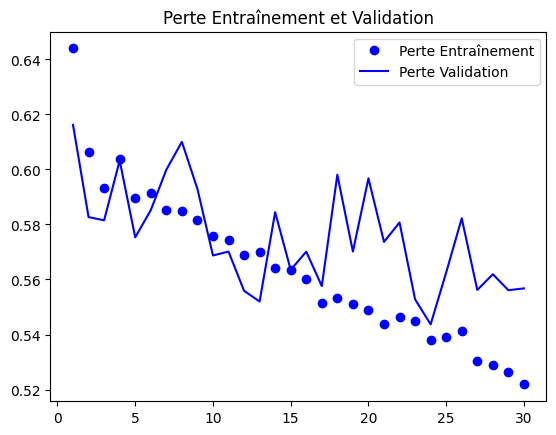

In [12]:
import matplotlib.pyplot as plt

# Visualiser la précision d'entraînement et de validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Précision
plt.plot(epochs, acc, 'bo', label='Précision Entraînement')
plt.plot(epochs, val_acc, 'b', label='Précision Validation')
plt.title('Précision Entraînement et Validation')
plt.legend()
plt.figure()

# Perte
plt.plot(epochs, loss, 'bo', label='Perte Entraînement')
plt.plot(epochs, val_loss, 'b', label='Perte Validation')
plt.title('Perte Entraînement et Validation')
plt.legend()
plt.show()

In [2]:
from tensorflow.keras.models import load_model

# Chemin vers le modèle sauvegardé
model_path = r'C:\Users\user\Desktop\data1\cnn_model_SMOKING.h5'

# Charger le modèle
model = load_model(model_path)
print("Modèle chargé avec succès.")

Modèle chargé avec succès.


In [ ]:
# Évaluation des performances sur l'ensemble de validation
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Perte de validation : {val_loss}")
print(f"Précision de validation : {val_accuracy}")


43/43 [==============================] - 82s 2s/step
              precision    recall  f1-score   support

  notsmoking       0.45      0.41      0.43       600
     smoking       0.56      0.60      0.58       748

    accuracy                           0.52      1348
   macro avg       0.50      0.50      0.50      1348
weighted avg       0.51      0.52      0.51      1348



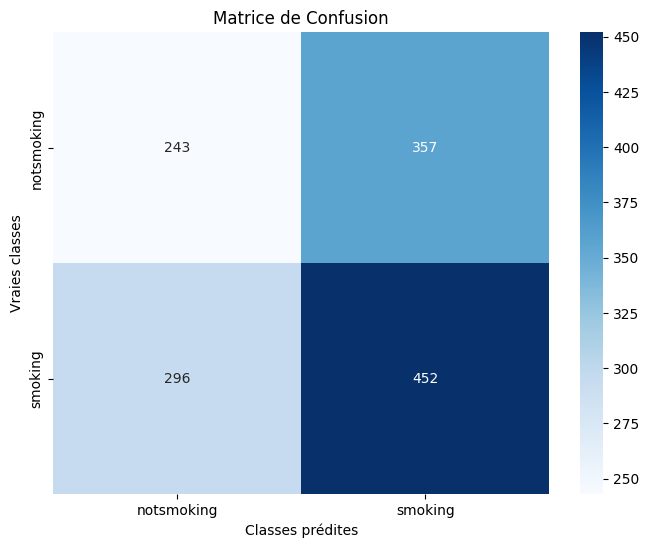

In [16]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Prédire les classes pour l'ensemble de validation
val_generator.reset()  # Réinitialiser le générateur
predictions = model.predict(val_generator, steps=val_generator.samples // val_generator.batch_size + 1)
predicted_classes = np.argmax(predictions, axis=1)

# Obtenir les vraies classes
true_classes = val_generator.classes
class_labels = list(val_generator.class_indices.keys())  # Labels de classes

# Générer le rapport de classification
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

# Matrice de confusion
conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title("Matrice de Confusion")
plt.ylabel('Vraies classes')
plt.xlabel('Classes prédites')
plt.show()


In [ ]:
# Afficher quelques images avec les prédictions et les vraies classes
import matplotlib.pyplot as plt
import numpy as np

# Récupérer quelques images et leurs vraies étiquettes
val_generator.reset()
images, labels = next(val_generator)

# Faire des prédictions sur ces images
predictions = model.predict(images)
predicted_classes = np.argmax(predictions, axis=1)

# Afficher les images avec leurs vraies et prédictions
plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    true_label = class_labels[np.argmax(labels[i])]
    predicted_label = class_labels[predicted_classes[i]]
    plt.title(f"Vraie: {true_label}\nPrédite: {predicted_label}")
    plt.axis('off')
plt.show()
